In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
vessel_positions_df = pd.read_csv('vessel_positions.csv')
vessel_char_df = pd.read_csv('vessel_characteristics.csv')

C:\Users\Mustafa Ashraf\AppData\Local\Temp\ipykernel_25984\2070354544.py:1: DtypeWarning: Columns (20,21,25,26,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  vessel_positions_df = pd.read_csv('vessel_positions.csv')
C:\Users\Mustafa Ashraf\AppData\Local\Temp\ipykernel_25984\2070354544.py:2: DtypeWarning: Columns (42,47,72,81,154,163,210) have mixed types. Specify dtype option on import or set low_memory=False.
  vessel_char_df = pd.read_csv('vessel_characteristics.csv')


In [ ]:
vessel_positions_df.head()

In [ ]:
vessel_positions_df.dtypes

In [ ]:
vessel_char_df.head()

In [ ]:
vessel_char_df.dtypes

In [ ]:
vessel_char_df.dtypes

In [9]:
print("Shape of Vessel Positions: ",vessel_positions_df.shape)
print("Shape of Vessel Charactersitics: ",vessel_char_df.shape)

Shape of Vessel Positions:  (71635, 54)
Shape of Vessel Charactersitics:  (14757, 212)


In [ ]:
print('Null values in Vessel Characteristics: ')
vessel_char_df.isnull().sum()

### Drop the features which have all null values

In [5]:
vessel_char_df = vessel_char_df.dropna(axis=1, how='all')

### Drop the features which have only 1 non null value

In [6]:
non_null_counts = vessel_char_df.notnull().sum()

features_one_value = non_null_counts[non_null_counts == 1].index.tolist()

vessel_char_df = vessel_char_df.drop(columns=features_one_value)

In [ ]:
vessel_char_df.dtypes

### Convert date and time to appropriate features

In [ ]:
# get all the date time columns
datetime_cols = ['zone_entry_time','zone_out_time','port_entry_time','port_out_time','waiting_zone_entry_time','waiting_zone_out_time']
for col in datetime_cols:
    # convert to date time objects
    vessel_positions_df[col] = pd.to_datetime(vessel_positions_df[col], format='%d/%m/%Y %H:%M', errors='coerce')


    vessel_positions_df[col + '_date'] = vessel_positions_df[col].dt.date
    vessel_positions_df[col + '_time'] = vessel_positions_df[col].dt.time

## Univariate Analysis

C:\Users\Mustafa Ashraf\AppData\Local\Temp\ipykernel_25984\737137369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vessel_operational_status', data=vessel_positions_df, palette='pastel')


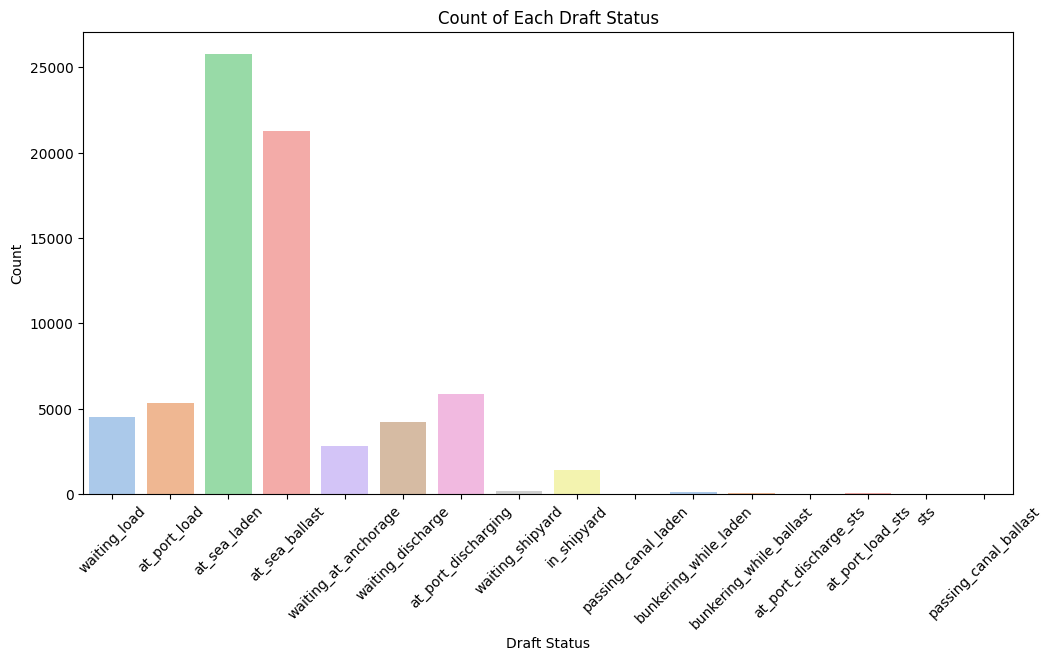

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='vessel_operational_status', data=vessel_positions_df, palette='pastel')

plt.xlabel('Draft Status')
plt.ylabel('Count')
plt.title('Count of Each Draft Status')
plt.xticks(rotation=45)
plt.show()

We can see that most vessels are at sea and laden with cargo, followed by vessels at sea and filled with ballast. There are also significant number of vessels waiting for load, loading at post, waiting at anchorage, waiting to be discharge, and in ship yard.

<Axes: xlabel='ais_speed', ylabel='Count'>

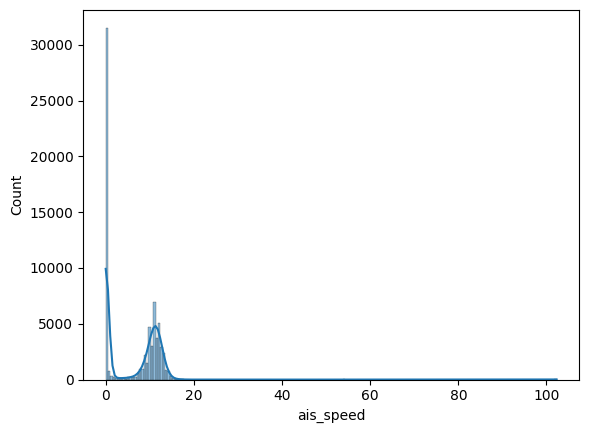

In [8]:
sns.histplot(vessel_positions_df['ais_speed'], kde=True)

In [9]:
vessel_positions_df['ais_speed'].describe()

count    71635.000000
mean         6.060473
std          6.414644
min          0.000000
25%          0.000000
50%          8.000000
75%         11.200000
max        102.300000
Name: ais_speed, dtype: float64

An initial analysis of ais_speed feature seems to be right skewed as there seems toe be vessels with ais_speed of 102.3 knots. This is due to some vessels moving faster than others. We can also see that on average vessels travel at 6.06 knots and have a standard deviation of 6.41 knots.

<Axes: xlabel='ais_draft', ylabel='Count'>

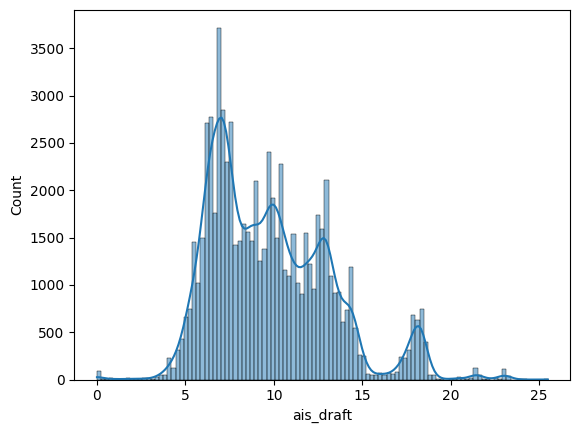

In [10]:
sns.histplot(vessel_positions_df['ais_draft'], kde=True)

In [12]:
vessel_positions_df['ais_draft'].describe()

count    71635.000000
mean         9.759088
std          3.408379
min          0.000000
25%          7.100000
50%          9.200000
75%         12.000000
max         25.500000
Name: ais_draft, dtype: float64

The distribution of the drafts is multimodal with a major peak between 6-7 meters and minor peaks at 9-11 meters, 12-13 meters, and 17-18 meters. The maximum draft is 25.5 meters and the minimum is 0 meters. On average a vessel has a draft of 9.759 meters and standard deviation of 3.408 meters.

## Bivariate Analysis

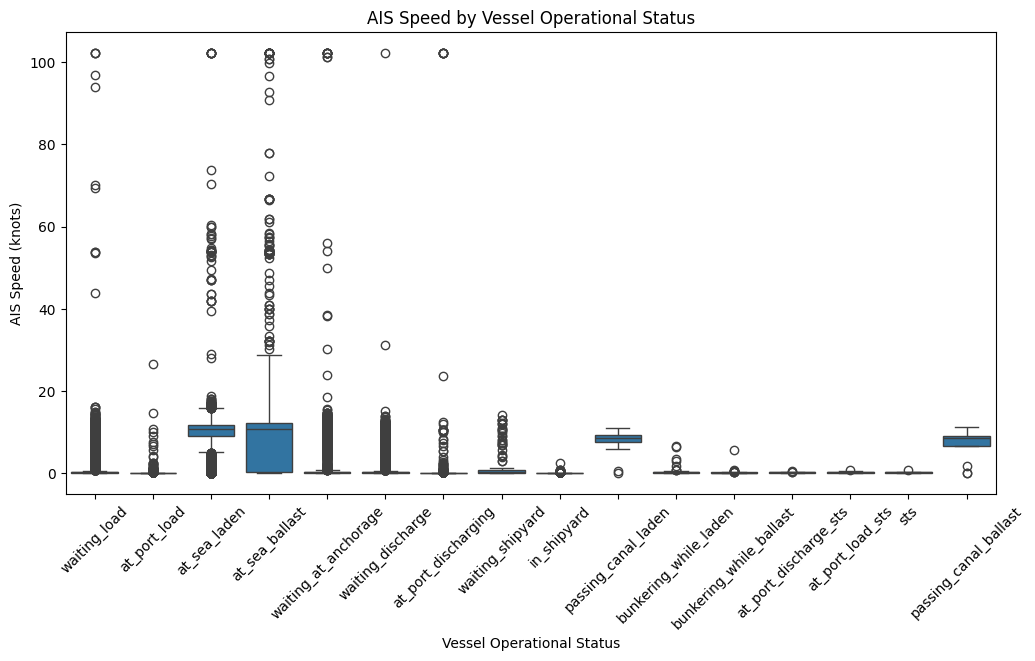

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='vessel_operational_status', y='ais_speed', data=vessel_positions_df)

plt.xlabel('Vessel Operational Status')
plt.ylabel('AIS Speed (knots)')
plt.title('AIS Speed by Vessel Operational Status')
plt.xticks(rotation=45)
plt.show()

Comparing the speed to the different vessel opeartional status, we can confirm that operations that require vessels to be stationary have their speeds at 0, with very few cases of vessels having some speed such as when discharging at the port. Where the vessel record speed is when it is operationally moving such as at sea and passing canal. When the vessel is laden and at sea it has a tigher distribution in its speed, whereas when the vessel is filled with ballast and at sea it has a wider distribution. This could be because there could be vessels travelling short distances between ports to be loaded with cargo. In the case of passing canals, the vessels have similar distribution wether laden or ballast which could be due to restrictions on speed in canals.

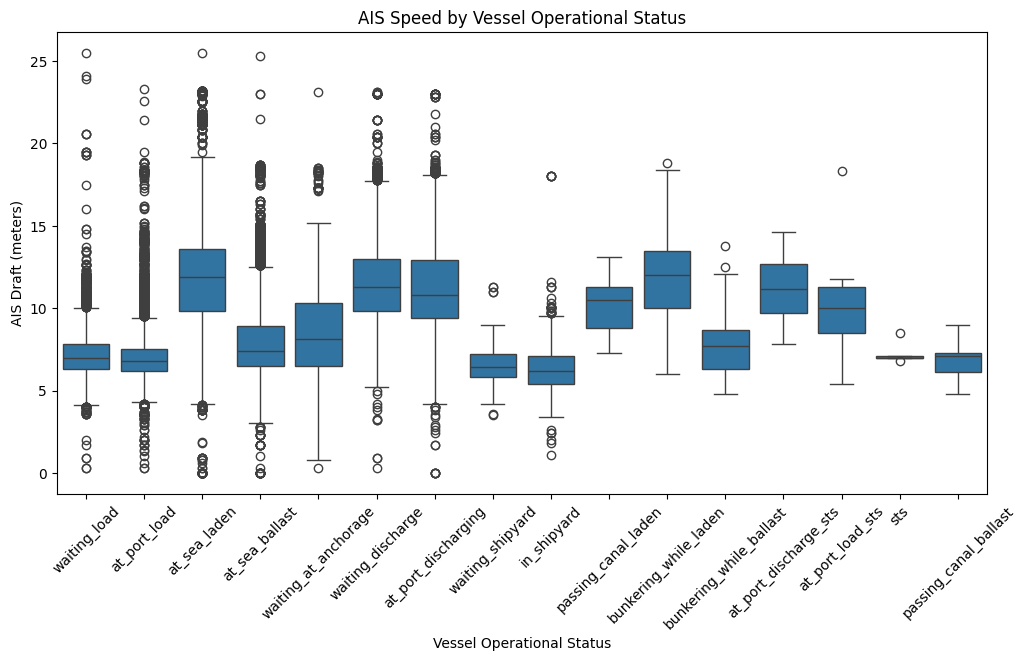

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='vessel_operational_status', y='ais_draft', data=vessel_positions_df)

plt.xlabel('Vessel Operational Status')
plt.ylabel('AIS Draft (meters)')
plt.title('AIS Speed by Vessel Operational Status')
plt.xticks(rotation=45)
plt.show()

We can see that when the vessel is at port its draft is distributed around 6 meters. Whereas, when it is at sea there draft varies greatly depending on if the vessel is carrying cargo or ballast. When the ship is waiting, if it is at anchorage the distribution varies between 6 and 10 meters, whereas if it is at discharge it has a higher distribution between 10 and 12 meters. There is a significant difference in distribution when the vessel is passing a canal when loaded with cargo and with ballast. When loaded with cargo it tends to have a higher distribution and when loaded with ballast it has a smaller and tighter distribution.

## Multivariate Analysis

<Figure size 800x300 with 0 Axes>

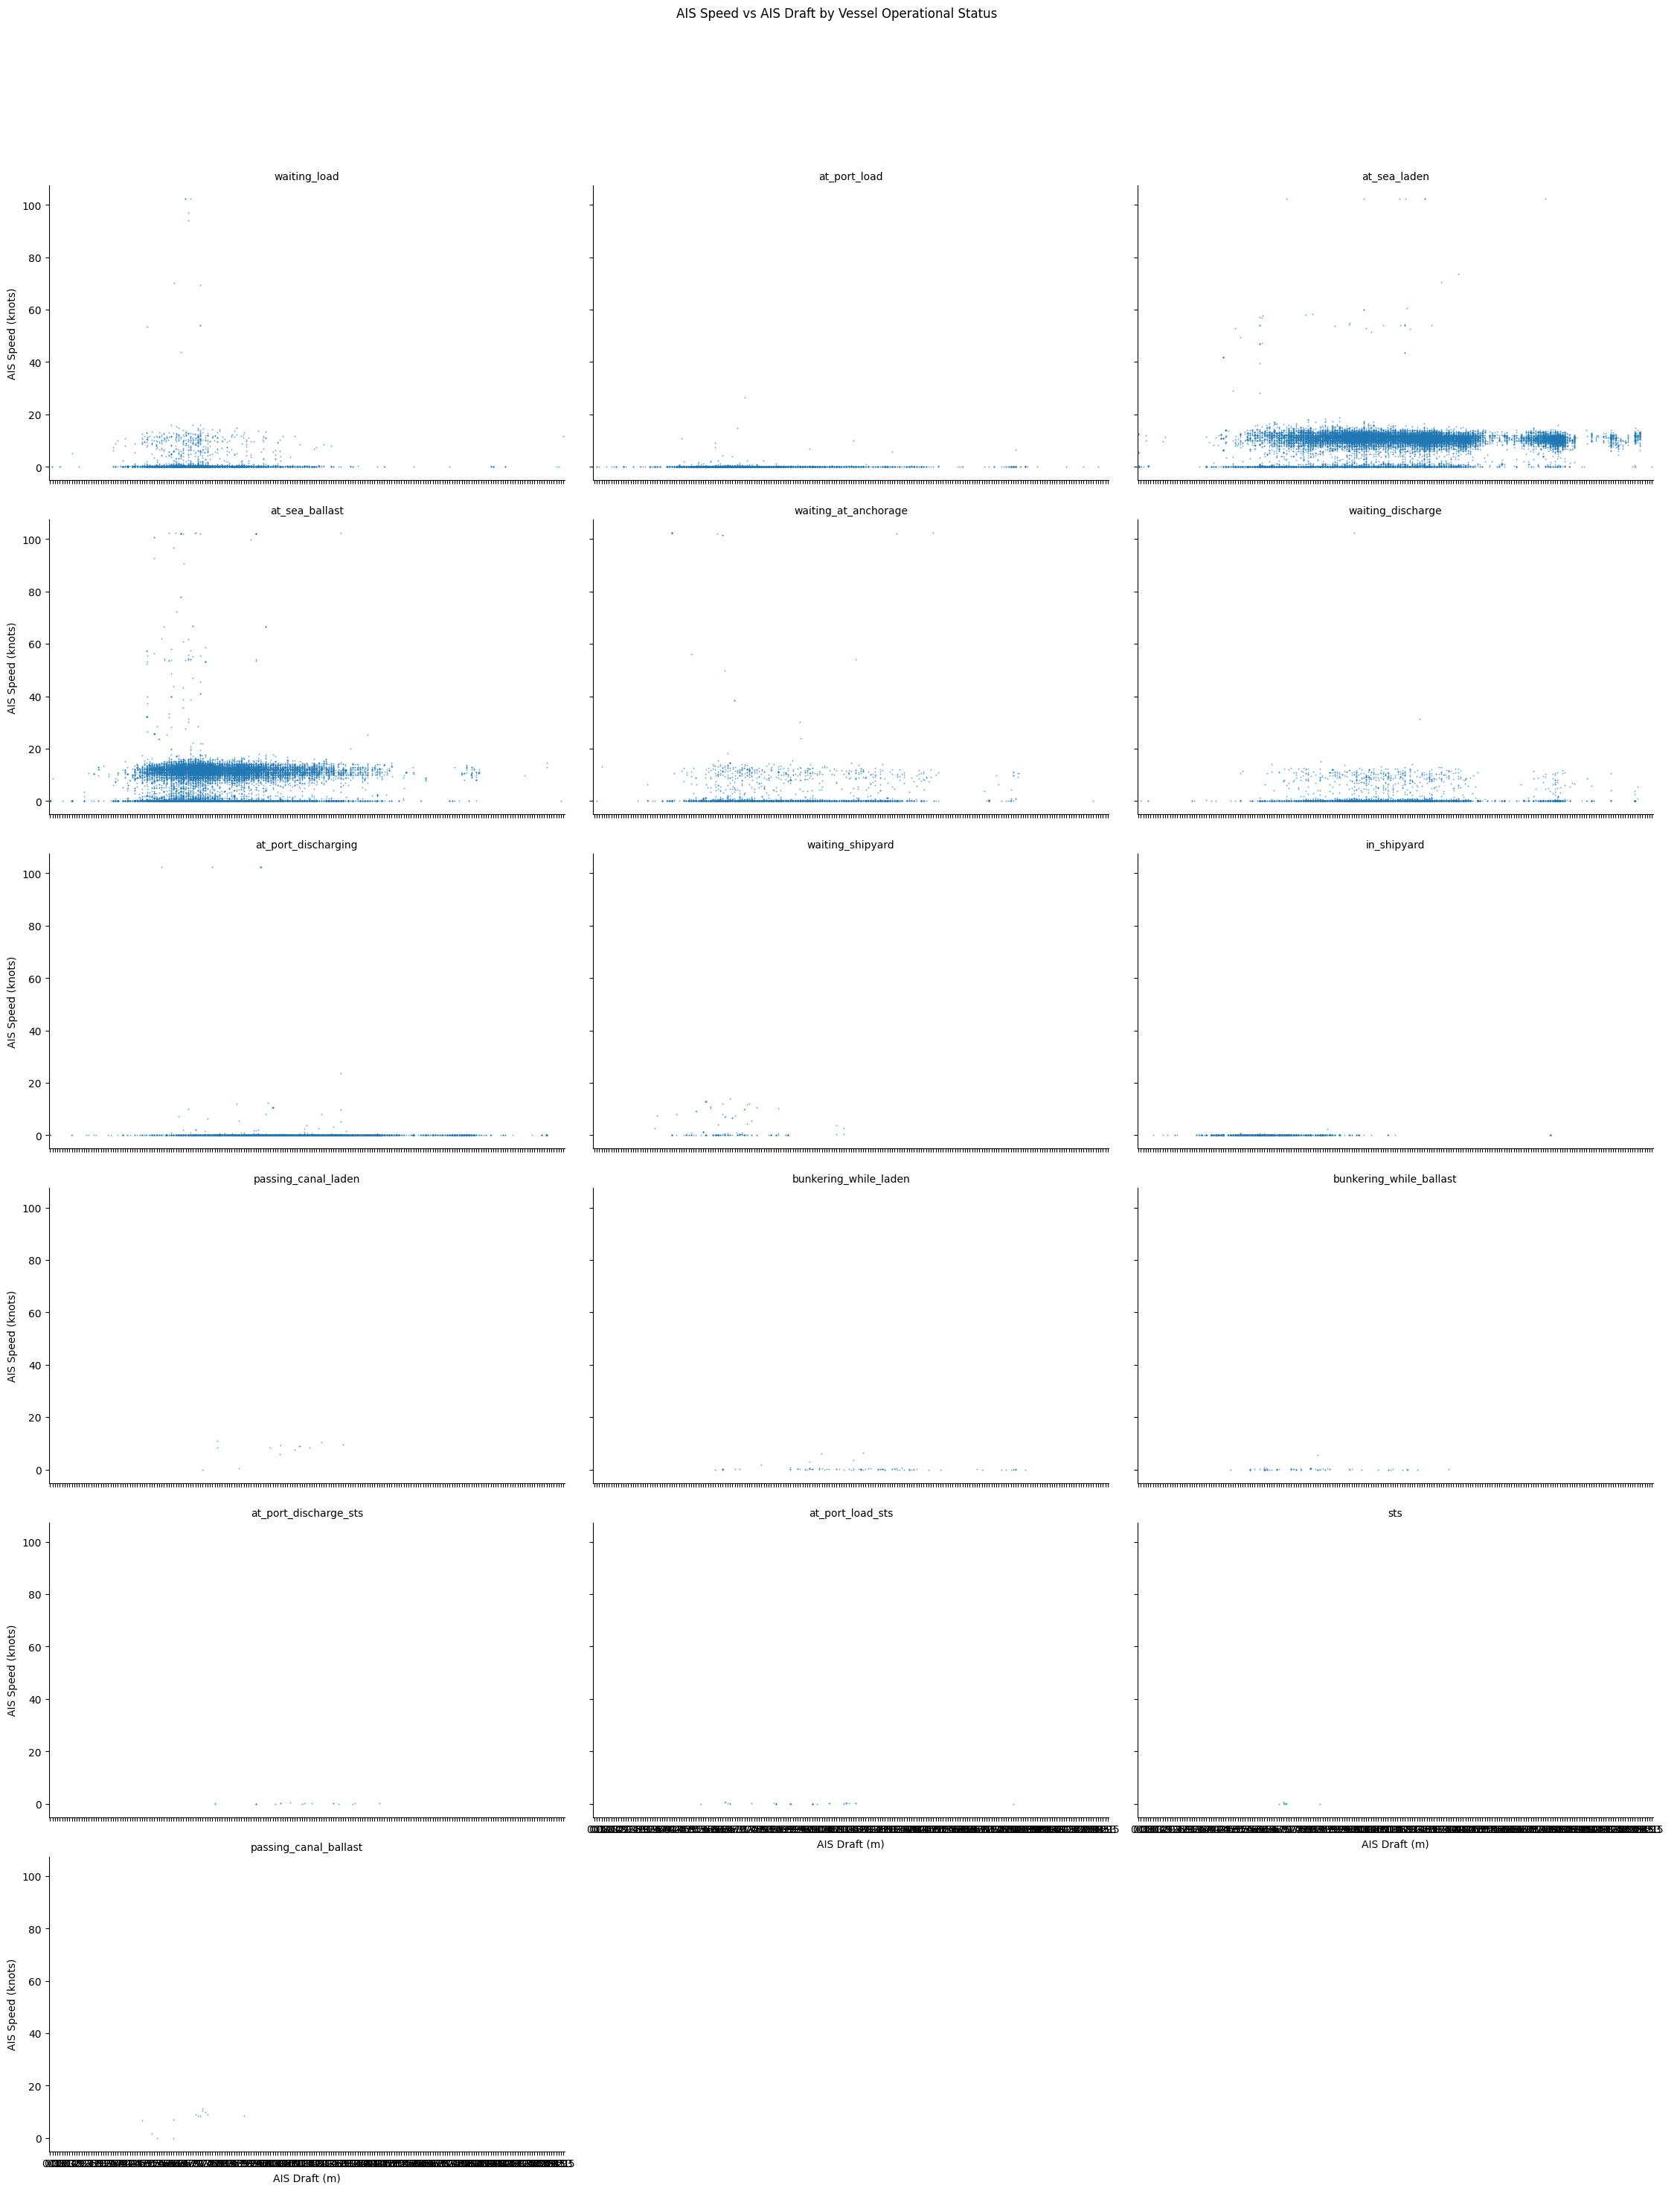

In [ ]:
plt.figure(figsize=(8, 3))
g = sns.catplot(
    data=vessel_positions_df,
    x='ais_draft',
    y='ais_speed',
    col='vessel_operational_status',
    kind='strip',
    col_wrap=3,
    height=5, 
    aspect=1.5, 
    s=2,
    alpha=0.6
)

g.set_axis_labels("AIS Draft (m)", "AIS Speed (knots)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("AIS Speed vs AIS Draft by Vessel Operational Status")
plt.show()


Vessel behavior varies significantly by operational status, as shown in the scatter plots of AIS speed versus AIS draft. Vessels classified as at_sea_laden and at_sea_ballast exhibit higher and more variable speeds, often exceeding 10 knots, which aligns with their active navigation status. Notably, at_sea_laden vessels tend to have higher draft values due to carrying cargo, while at_sea_ballast vessels display lower drafts, reflecting a lighter load. In contrast, vessels that are stationary or engaged in port operations such as at_port_load, at_port_discharge, waiting_discharge, and waiting_load show minimal or zero speeds, with moderate to high draft values consistent with cargo handling. Vessels waiting at anchorage or shipyard generally remain stationary but exhibit a broader range of draft values, suggesting a mix of ship types. Those passing through canals have moderate drafts and restricted speeds, likely due to navigational constraints. Additionally, vessels engaged in bunkering operations are nearly stationary, as expected during refueling. Overall, vessel speed and draft strongly reflect operational context, with moving vessels typically showing distinct draft profiles depending on whether they are laden or in ballast, and stationary vessels clustering near zero speed with varying drafts based on their port or waiting status.

### Creating New Dimension

In [34]:
# using pandas pd.cut()

bins = [0,40000,59999,99999,float('inf')]
categories = ['Handymax','Supramax','Panamax','Capesize']

vessel_positions_df['vessel_class'] = pd.cut(
    vessel_positions_df['vessel_dwt'],
    bins=bins,
    labels=categories,
    right=True
)

vessel_positions_df['vessel_class'].head()

0    Handymax
1    Handymax
2    Handymax
3    Handymax
4    Handymax
Name: vessel_class, dtype: category
Categories (4, object): ['Handymax' < 'Supramax' < 'Panamax' < 'Capesize']

In [35]:
vessel_positions_df['vessel_class'].value_counts()

vessel_class
Handymax    23858
Panamax     23409
Supramax    14245
Capesize    10123
Name: count, dtype: int64

There's 23858 Handymax vessels, 23409 Panamax vessels, 14245 Supramax vessels, and 10123 capesize vessels

C:\Users\Mustafa Ashraf\AppData\Local\Temp\ipykernel_25984\1638587189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vessel_class', data=vessel_positions_df, palette='pastel')


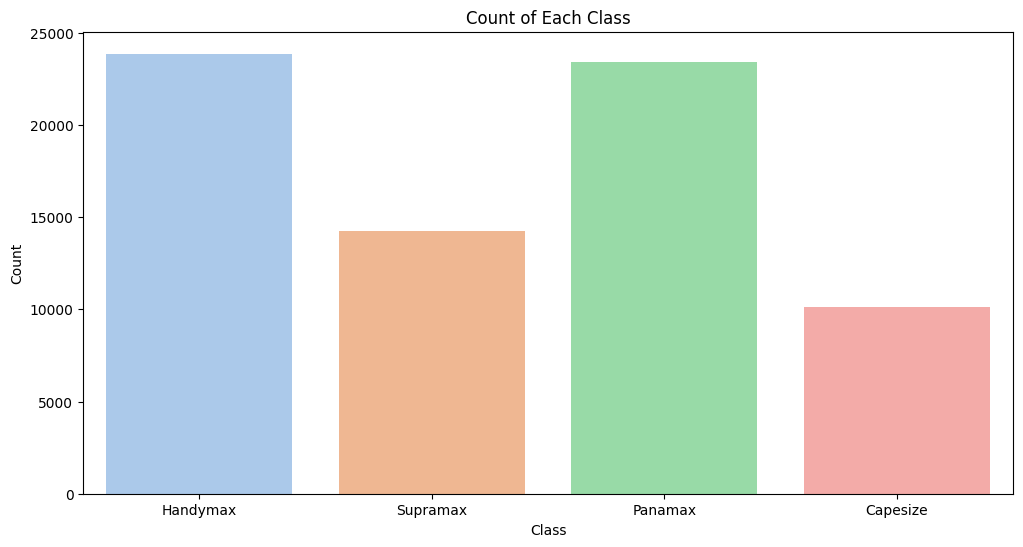

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='vessel_class', data=vessel_positions_df, palette='pastel')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')
plt.show()

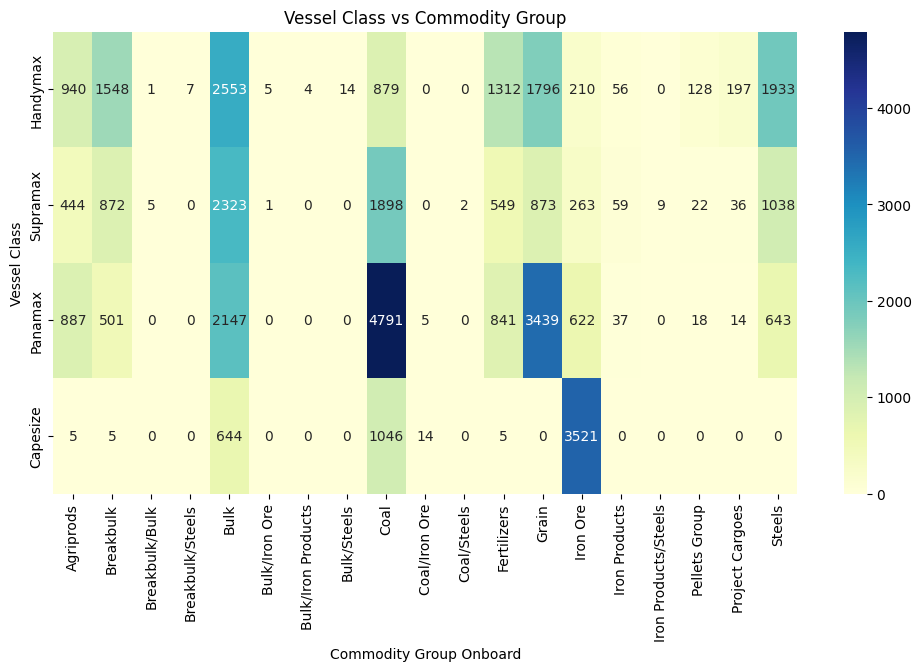

In [42]:
contingency_table = pd.crosstab(vessel_positions_df['vessel_class'], vessel_positions_df['vessel_commodity_group_onboard'])

plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Vessel Class vs Commodity Group')
plt.ylabel('Vessel Class')
plt.xlabel('Commodity Group Onboard')
plt.show()

This heatmap shows how different types of ships are used to carry different kinds of cargo. Handymax vessels have the most variety in cargo especially grain, bulk cargo, steels, and agricultural products. Supramax vessels are similar but tend to focus more on grain, bulk, and coal, which suggests they’re commonly used for slightly larger shipments. Panamax vessels, which have a higher dwt, are mostly used for heav commodities like coal and iron ore, but also see a lot of use with grain and fertilizers. Capesize vessels nare almost entirely used for iron ore and coal, which makes sense since they have the highest dwt. Overall, the higher the dwt of the vessel, the heavier commodity it can carry.

### Defining South East Asia Region

In [ ]:
import folium
from shapely.geometry import Polygon, Point

# define approximate coordinates
southeast_asia_coords = [
    (13.76, 80.71),
    (21.13, 89.50), 
    (20.72, 128.79),
    (-0.59, 140.83),
    (-11.76, 140.65),  
    (-8.13, 89.41), 
    (13.76, 80.71) 
]

# create polygon
southeast_asia_polygon = Polygon(southeast_asia_coords)

# create map
m = folium.Map(location=[12, 105], zoom_start=4)

folium.PolyLine(
    locations=southeast_asia_coords,  
    color='red',           
    weight=3,              
    opacity=0.8,           
    dash_array='5,5',      
    tooltip='Southeast Asia'  
).add_to(m)

m

In [ ]:
vessels_within_polygon = []
for index, row in vessel_positions_df.iterrows():
    point = Point(row['ais_lat'], row['ais_long'])
    # if vessels are within the polygon add to list
    if southeast_asia_polygon.contains(point):
        vessels_within_polygon.append(row)
# convert result to dataframe
result_df = pd.DataFrame(vessels_within_polygon)

c:\Users\Mustafa Ashraf\Downloads\programming_test_vessel_analysis\venv\lib\site-packages\shapely\predicates.py:526: RuntimeWarning: invalid value encountered in contains
  return lib.contains(a, b, **kwargs)


In [ ]:
print('Vessels around South East Asian countries:')
print(vessel_char_df[vessel_char_df['imo'].isin(result_df['imo'])]['name'])


### Putting it altogether

In [ ]:
start_date = pd.to_datetime('2024-08-20')
end_date = pd.to_datetime('2024-08-24')

# filter the vessels that have left the port within the date range
result_df['port_out_time_date'] = pd.to_datetime(result_df['port_out_time_date'], errors='coerce')
filtered_result_df = result_df[(result_df['port_out_time_date'] >= start_date) & (result_df['port_out_time_date'] <= end_date)]

In [145]:
print('Cargo onboard')
filtered_result_df['vessel_commodity_onboard'].value_counts()

Cargo onboard


vessel_commodity_onboard
Steam Coal               164
Nickel Ore                36
Steels                    14
Wood Chips                13
Clinker                    9
Cement                     9
Wheat                      7
Iron Ore                   5
Coking Coal                5
Soybean Meal               5
Woodpulp                   4
Alumina                    4
Slag                       4
Bulk Fertilizers           3
Urea                       3
Gypsum                     3
Copper Concentrate         2
Limestone                  2
Logs                       2
Corn                       2
Sugar                      2
MetCoke                    2
Sands                      1
Soybeans                   1
Soda Ash                   1
Rice                       1
Magnetite Ore              1
Steel Coils                1
HRC                        1
Aggregates                 1
Copper Cathodes            1
Coal                       1
Palm Kernel Shell          1
Palm Kernel Expell

Majority of the cargo on board are natural resources and minerals

In [146]:
export_counts = (
    filtered_result_df
    .groupby(['country_name', 'vessel_commodity_onboard'])
    .size()
    .reset_index(name='count')
)

# Get the top 2 exports per country
top_exports = (
    export_counts
    .sort_values(['country_name', 'count'], ascending=[True, False])
    .groupby('country_name')
    .head(2)
)

print(top_exports)


   country_name vessel_commodity_onboard  count
0      Cambodia               Steam Coal      1
1         China                     Coal      1
2         China               Wood Chips      1
19    Indonesia               Steam Coal    132
7     Indonesia                  Clinker      5
34     Malaysia               Steam Coal      6
27     Malaysia                 Iron Ore      3
38      Myanmar                   Steels      1
39      Myanmar                    Wheat      1
43  Philippines               Nickel Ore     30
46  Philippines               Steam Coal      9
51    Singapore                   Cement      2
50    Singapore               Aggregates      1
62     Thailand                   Steels      5
61     Thailand               Steam Coal      4
77      Vietnam               Steam Coal     11
82      Vietnam               Wood Chips      7


In [148]:
print("Vessels are headed to:")
filtered_result_df['real_destination_country_name'].value_counts()

Vessels are headed to:


real_destination_country_name
China                        91
Indonesia                    79
Vietnam                      31
Philippines                  27
India                        24
Thailand                     23
Malaysia                     22
Japan                        15
Singapore                     7
Korea South                   7
Taiwan, Province of China     5
Australia                     4
Bangladesh                    3
Turkiye                       2
Brunei Darussalam             1
Cambodia                      1
Spain                         1
Italy                         1
Benin                         1
South Africa                  1
United Kingdom                1
Sri Lanka                     1
United Arab Emirates          1
Oman                          1
Myanmar                       1
Russia                        1
Papua New Guinea              1
Hong Kong                     1
Egypt                         1
New Zealand                   1
Name: coun

In [ ]:
vessel_merge_df = vessel_positions_df.merge(vessel_char_df, on='imo', how='left')

# find the operators and the number of ships they operate
operators = (
    vessel_merge_df.groupby('tc_operator')['imo']
    .nunique()
    .sort_values(ascending=False)
    .reset_index(name='unique_vessels')
)

print("Top 10 operators in Southeast Asia:")
print(operators.head(10))

Top active operators in Southeast Asia during August 20–24, 2024:
               tc_operator  unique_vessels
0      OLDENDORFF CARRIERS             584
1   COSCO SHIPPING BULK CO             202
2  STAR BULK CARRIERS CORP             153
3   PACIFIC BASIN SHIPPING             123
4      WISDOM MARINE LINES             120
5                     VALE             118
6              UNCOMMITTED             112
7                   FEDNAV              97
8       GOLDEN OCEAN GROUP              86
9             MUR SHIPPING              79


Assuming that the vessel's charactersitc draft is its maximum draft, we can use a ratio of the real time draft to the characteristic draft. If the real time draft is close to the maximum draft, i.e. 90% of the maximum draft we can assume that the ship has been loaded. Oppositely, if the real time draft is 20% of the maximum draft we can assume that it is currently empty. Lastly, anything in between can be considered that the ship is currently being loaded.

In [ ]:
# calculate draft ratio
vessel_merge_df['draft_ratio'] = vessel_merge_df['ais_draft'] / vessel_merge_df['draft']

# find the status of the vessel's load
status_lambda = lambda draft_ratio: (
    'Finished loading' if draft_ratio > 0.9 else
    'Loading' if 0.5 < draft_ratio <= 0.9 else
    'Empty'
)

vessel_merge_df['status'] = vessel_merge_df['draft_ratio'].apply(status_lambda)

In [155]:
vessel_merge_df['status'].head()

0               Empty
1             Loading
2               Empty
3               Empty
4    Finished loading
Name: status, dtype: object